# <center> Разведовательный анализ данных

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from scipy.stats import ks_2samp, mode

warnings.filterwarnings("ignore")
plt.style.use('classic')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [2]:
paths = {
    'agro' : 'data/agro/agro.csv',
    'syn'   : list(Path('data/syn/').rglob('*.csv'))
}

In [246]:
agro = pd.read_csv(paths['agro'])

In [240]:
agro.shape[0]

163476

In [247]:
print(agro[['ind', 'dec', 'kult', 'year', 'month', 'day']].agg(['nunique', 'min', 'max']).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    ind &  dec &  kult &  year &  month &  day \\
\midrule
nunique &    753 &   21 &   177 &    16 &      7 &    4 \\
min     &  22559 &   10 &     0 &  2004 &      4 &    7 \\
max     &  66103 &   30 &   993 &  2019 &     10 &   28 \\
\bottomrule
\end{tabular}



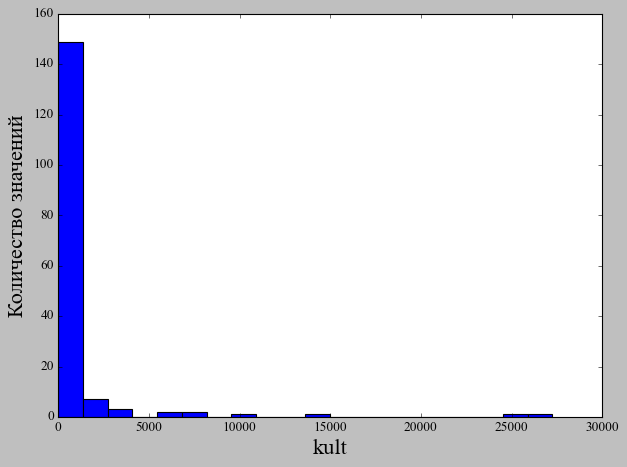

In [51]:
ax = agro.kult.value_counts().sort_index().hist(bins=20)
ax.set_ylabel('Количество значений', size=20)
ax.set_xlabel('kult', size=20)
plt.grid()
plt.tight_layout()
plt.show()

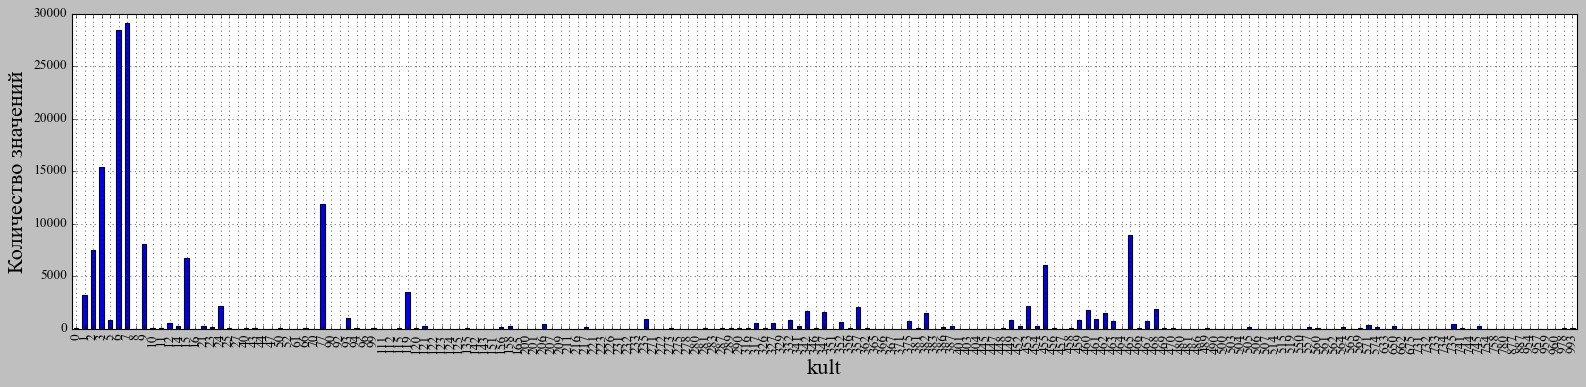

In [19]:
ax = agro.kult.value_counts().sort_index().plot.bar(figsize=(20,5))
ax.set_ylabel('Количество значений', size=20)
ax.set_xlabel('kult', size=20)
plt.grid()
plt.tight_layout()
plt.savefig('assets/kult.png')
plt.show()

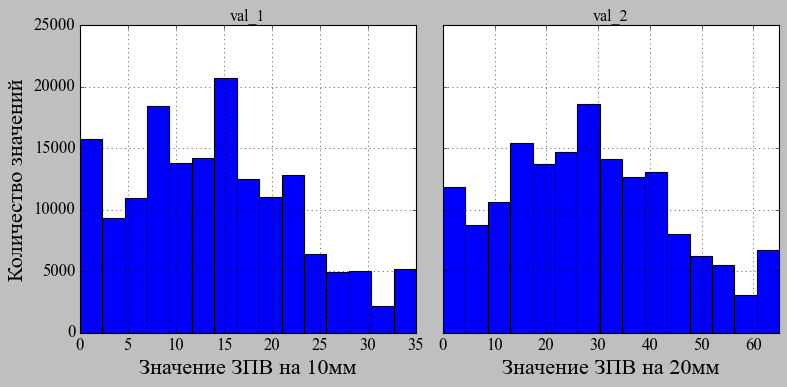

In [21]:
ax = agro.hist(sharey=True, figsize=(10,5), bins=15, column=['val_1', 'val_2'], xlabelsize=15, ylabelsize=15)
ax[0,0].set_ylabel('Количество значений', size=20)
ax[0,0].set_xlabel('Значение ЗПВ на 10мм', size=20)
ax[0,1].set_xlabel('Значение ЗПВ на 20мм', size=20)
ax[0,0].set_xlim(xmax=agro.val_1.max(), xmin=agro.val_1.min())
ax[0,1].set_xlim(xmax=agro.val_2.max(), xmin=agro.val_2.min())
plt.tight_layout()
plt.savefig('assets/val.png')
plt.show()

In [250]:
def load_agro(path: str) -> pd.DataFrame:

    agro = pd.read_csv(path)
    agro.loc[:,'datetime'] = pd.to_datetime(agro.year.astype(str)+agro.month.astype(str)\
        + agro.day.astype(str)+np.ones(len(agro), dtype='str'), format='%Y%m%d%H', origin='unix')
    agro = agro.drop(['month', 'day'], axis=1)
    agro.loc[:,'prev'] = agro.dec - 1

    return agro

In [253]:
agro = load_agro(paths['agro'])
agro = agro.merge(agro, left_on=['ind', 'dec', 'year'], right_on=['ind', 'prev', 'year'], suffixes=('', '_next'))

In [266]:
agro.loc[:, 'dur'] = (agro.datetime_next - agro.datetime).dt.days

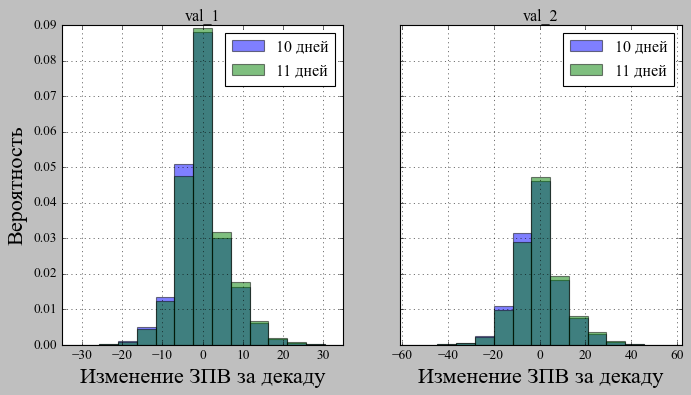

In [313]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

_, bins, _ = ax[0].hist(agro[agro.dur == 10].val_1_next-agro[agro.dur == 10].val_1, bins=15, density=True, alpha=0.5, label='10 дней')
_, bins, _ = ax[0].hist(agro[agro.dur == 11].val_1_next-agro[agro.dur == 11].val_1, bins=bins, density=True, alpha=0.5, label='11 дней')
_, bins, _ = ax[1].hist(agro[agro.dur == 10].val_2_next-agro[agro.dur == 10].val_2, bins=15, density=True, alpha=0.5, label='10 дней')
_, bins, _ = ax[1].hist(agro[agro.dur == 11].val_2_next-agro[agro.dur == 11].val_2, bins=bins, density=True, alpha=0.5, label='11 дней')
ax[0].set_xlim(xmax=(agro[agro.dur == 10].val_1_next-agro[agro.dur == 10].val_1).max(), 
               xmin=(agro[agro.dur == 10].val_1_next-agro[agro.dur == 10].val_1).min())
ax[1].set_xlim(xmax=(agro[agro.dur == 10].val_2_next-agro[agro.dur == 10].val_2).max(), 
               xmin=(agro[agro.dur == 10].val_2_next-agro[agro.dur == 10].val_2).min())
ax[0].set_xlabel('Изменение ЗПВ за декаду', size=20)
ax[1].set_xlabel('Изменение ЗПВ за декаду', size=20)
ax[0].set_ylabel('Вероятность', size=20)
ax[0].grid()
ax[1].grid()
ax[0].set_title('val_1')
ax[1].set_title('val_2')
ax[0].legend()
ax[1].legend()
plt.show()

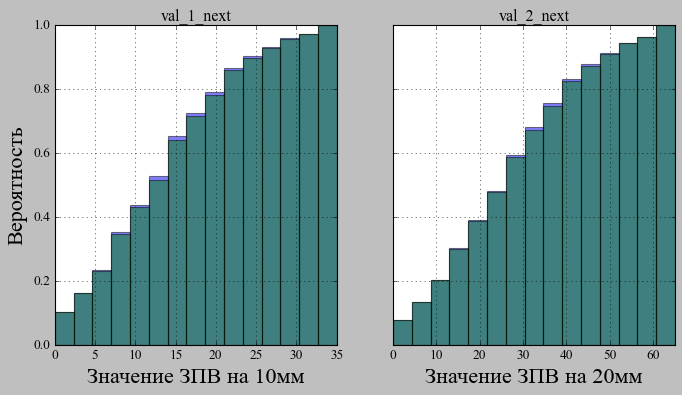

In [337]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

_, bins, _ = ax[0].hist(agro[agro.dur == 10].val_1_next, bins=15, density=True, alpha=0.5, cumulative=True)
_, bins, _ = ax[0].hist(agro[agro.dur == 11].val_1_next, bins=bins, density=True, alpha=0.5, cumulative=True)
_, bins, _ = ax[1].hist(agro[agro.dur == 10].val_2_next, bins=15, density=True, alpha=0.5, cumulative=True)
_, bins, _ = ax[1].hist(agro[agro.dur == 11].val_2_next, bins=bins, density=True, alpha=0.5, cumulative=True)
ax[0].set_xlim(xmax=(agro[agro.dur == 10].val_1_next).max(), 
               xmin=(agro[agro.dur == 10].val_1_next).min())
ax[1].set_xlim(xmax=(agro[agro.dur == 10].val_2_next).max(), 
               xmin=(agro[agro.dur == 10].val_2_next).min())
ax[0].set_xlabel('Значение ЗПВ на 10мм', size=20)
ax[1].set_xlabel('Значение ЗПВ на 20мм', size=20)
ax[0].set_ylabel('Вероятность', size=20)
ax[0].grid()
ax[1].grid()
ax[0].set_title('val_1_next')
ax[1].set_title('val_2_next')
plt.show()

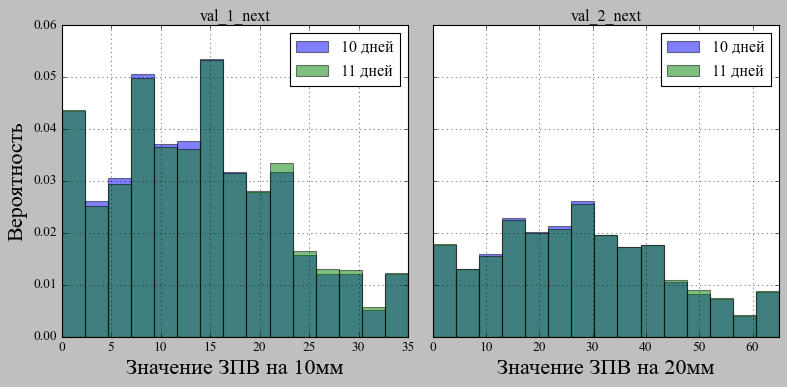

In [338]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

_, bins, _ = ax[0].hist(agro[agro.dur == 10].val_1_next, bins=15, density=True, alpha=0.5, label='10 дней')
_, bins, _ = ax[0].hist(agro[agro.dur == 11].val_1_next, bins=bins, density=True, alpha=0.5, label='11 дней')
_, bins, _ = ax[1].hist(agro[agro.dur == 10].val_2_next, bins=15, density=True, alpha=0.5, label='10 дней')
_, bins, _ = ax[1].hist(agro[agro.dur == 11].val_2_next, bins=bins, density=True, alpha=0.5, label='11 дней')
ax[0].set_xlim(xmax=(agro[agro.dur == 10].val_1_next).max(), 
               xmin=(agro[agro.dur == 10].val_1_next).min())
ax[1].set_xlim(xmax=(agro[agro.dur == 10].val_2_next).max(), 
               xmin=(agro[agro.dur == 10].val_2_next).min())
ax[0].set_xlabel('Значение ЗПВ на 10мм', size=20)
ax[1].set_xlabel('Значение ЗПВ на 20мм', size=20)
ax[0].set_ylabel('Вероятность', size=20)
ax[0].grid()
ax[1].grid()
ax[0].set_title('val_1_next')
ax[1].set_title('val_2_next')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('assets/hist_val.png')
plt.show()

In [339]:
for i in range(2):
    x1 = agro[agro.dur == 10][f'val_{i+1}_next']
    x2 = agro[agro.dur == 11][f'val_{i+1}_next']
    stat, p = ks_2samp(x1,x2)
    print(f'val_{i+1}_next K-S stat: {stat.round(3)}, p-val: {p.round(3)}')

val_1_next K-S stat: 0.013, p-val: 0.001
val_2_next K-S stat: 0.009, p-val: 0.036


In [319]:
df

,dur,val_1,val_2
0,10,6.246275e-13,4.147003e-16
1,11,4.118633e-01,7.666505e-01


In [38]:
print(agro[['val_1', 'val_2', 'val_1_next', 'val_2_next']].corr('spearman').to_latex(float_format='%.2f'))

\begin{tabular}{lrrrr}
\toprule
{} &  val\_1 &  val\_2 &  val\_1\_next &  val\_2\_next \\
\midrule
val\_1      &   1.00 &   0.98 &        0.73 &        0.74 \\
val\_2      &   0.98 &   1.00 &        0.76 &        0.78 \\
val\_1\_next &   0.73 &   0.76 &        1.00 &        0.98 \\
val\_2\_next &   0.74 &   0.78 &        0.98 &        1.00 \\
\bottomrule
\end{tabular}



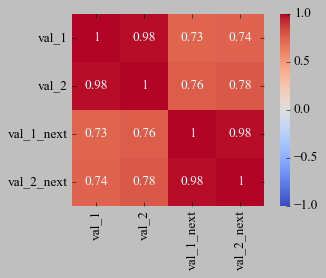

In [40]:
plt.figure(figsize=(5,3))
sns.heatmap(agro[['val_1', 'val_2', 'val_1_next', 'val_2_next']].corr('spearman'), cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)
plt.show()

In [54]:
(163476 - 143884)/163476 * 100

11.98463383004233

In [55]:
def load_syn(path: str) -> pd.DataFrame:

    syn = pd.read_csv(path, usecols=['s_ind', 'datetime', 't2m', 'td2m', 'ff', 'R12'])
    syn.loc[syn.datetime.astype(str).str.len() == 7, 'datetime'] = '0'+\
        syn[syn.datetime.astype(str).str.len() == 7].datetime.astype(str)
    syn.loc[:, 'datetime'] = pd.to_datetime(syn.datetime, format='%y%m%d%H')

    return syn

In [193]:
syn = pd.concat([load_syn(file) for file in paths['syn']], axis=0)

In [194]:
syn.loc[:, 'phi'] = np.sin(((syn.datetime-pd.Timestamp('1970-01-01'))/pd.Timedelta(seconds=1)/pd.Timedelta(days=365.24).total_seconds()*2*np.pi))

In [195]:
print(syn[['t2m', 'td2m', 'ff', 'R12']].describe().round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          t2m &         td2m &           ff &         R12 \\
\midrule
count &  12407339.00 &  12392894.00 &  12387862.00 &  4130156.00 \\
mean  &        13.25 &         6.17 &         2.42 &      520.39 \\
std   &         8.75 &         7.32 &         2.29 &     2201.93 \\
min   &       -96.70 &       -98.50 &         0.00 &        0.00 \\
25\%   &         7.10 &         1.10 &         1.00 &        0.00 \\
50\%   &        13.50 &         7.00 &         2.00 &        0.00 \\
75\%   &        19.40 &        11.80 &         3.00 &        3.00 \\
max   &        99.20 &        99.90 &       904.00 &     9990.00 \\
\bottomrule
\end{tabular}



In [208]:
def clear_data(syn: pd.DataFrame):

    syn.R12[syn.R12 == 9990] = 0.1
    syn = syn[syn.t2m.abs() < 60]
    syn = syn[syn.td2m.abs() < 60]
    syn = syn[syn.ff <= 30]
    
    return syn


In [209]:
syn = clear_data(syn.copy())

In [219]:
r12 = (syn.sort_values(['s_ind', 'datetime']).groupby(['s_ind', 'datetime']).R12.sum()/4).fillna(method='bfill', limit=3).fillna(0).reset_index()

In [220]:
syn = syn.merge(r12, on=['s_ind', 'datetime'])

In [224]:
syn.rename(columns={'R12_y': 'R3'}, inplace=True)
syn.drop('R12_x', axis=1, inplace=True)

In [232]:
print(syn[['t2m', 'td2m', 'ff', 'R3', 'phi']].describe().round(2).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &          t2m &         td2m &           ff &           R3 &          phi \\
\midrule
count &  12325619.00 &  12325619.00 &  12325619.00 &  12325619.00 &  12325619.00 \\
mean  &        13.23 &         6.17 &         2.40 &         0.67 &        -0.13 \\
std   &         8.74 &         7.31 &         1.85 &         4.66 &         0.74 \\
min   &       -55.50 &       -55.90 &         0.00 &         0.00 &        -1.00 \\
25\%   &         7.10 &         1.10 &         1.00 &         0.00 &        -0.90 \\
50\%   &        13.50 &         7.00 &         2.00 &         0.00 &        -0.26 \\
75\%   &        19.40 &        11.80 &         3.00 &         0.00 &         0.61 \\
max   &        59.50 &        58.90 &        30.00 &       850.00 &         1.00 \\
\bottomrule
\end{tabular}



In [235]:
((12407339 - 12325619) / 12407339) * 100

0.6586424373509904

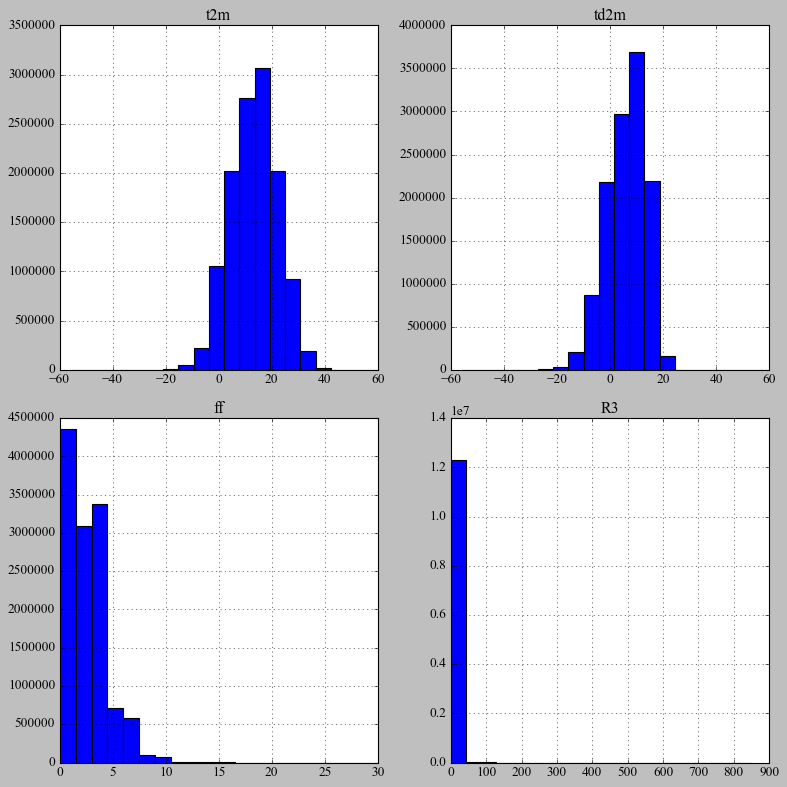

In [229]:
syn[['t2m', 'td2m', 'ff', 'R3']].hist(figsize=(10,10), bins=20)
plt.tight_layout()
plt.show()

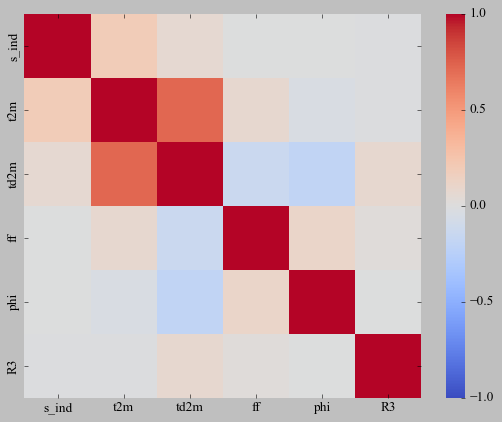

In [230]:
sns.heatmap(syn.corr(), vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [123]:
syn = syn[syn.t2m.abs() <= syn.t2m.std()*4]
s, d = syn[syn.t2m == syn.t2m.min()][['s_ind', 'datetime']].iloc[0].values

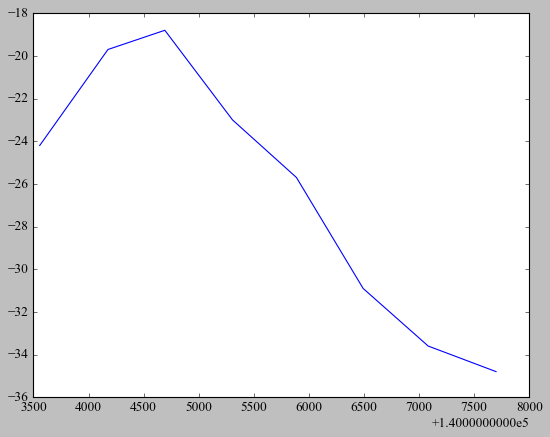

In [124]:
syn[(syn.s_ind == s) & (syn.datetime.dt.date == d.date())].t2m.plot.line()
plt.show()

In [2]:
import netCDF4
from geotiff import GeoTiff

In [5]:
def load_climate(optinons: dict, pairs: pd.DataFrame) -> pd.DataFrame:

    path = list(optinons.keys())[0]
    nc = netCDF4.Dataset(path)

    latmask = np.argmin(pairwise_distances(nc['lat'][:].data.reshape(-1, 1),
                                        pairs['s_lat'].values.reshape(-1, 1)), axis=0)
    lonmask = np.argmin(pairwise_distances(nc['lon'][:].data.reshape(-1, 1),
                                        pairs['s_lon'].values.reshape(-1, 1)), axis=0)

    climate = pd.DataFrame()

    for i in range(12):

        df = pairs[['s_ind']].copy()

        for path in optinons.keys():

            nc = netCDF4.Dataset(path)
            df.loc[:, 'month'] = i+1
            df.loc[:, optinons[path]] = nc[optinons[path]][i].data[latmask, lonmask]

        climate = pd.concat((climate, df), axis=0, ignore_index=True)

    return climate.drop_duplicates()

In [23]:
CLIMATE_OPT = {
    'data/climate/air.mon.1981-2010.ltm.nc': 'air',
    'data/climate/soilw.mon.ltm.v2.nc': 'soilw',
    'data/climate/precip.mon.ltm.0.5x0.5.nc': 'precip'
}

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
def decode_tif(lat: np.array, lon: np.array, tifname: str) -> np.array:

    lon1 = lon.min()
    lon2 = lon.max()
    lat1 = lat.min()
    lat2 = lat.max()
    arr = np.array(GeoTiff(tifname).read_box([(lon1, lat1), (lon2, lat2)]))

    return arr

In [5]:
pairs = pd.read_csv('data/pairs/pairs.csv')

In [26]:
for path in CLIMATE_OPT.keys():
    for i in range(12):
        
        ax = plt.subplot()
        nc = netCDF4.Dataset(path)
        data = nc[CLIMATE_OPT[path]][i].data
        vmin, vmax = nc[CLIMATE_OPT[path]].valid_range
        if CLIMATE_OPT[path] == 'air':
            data -= 273
            data[data == -9.96921e+36-273] = np.nan
            vmin -= 273
            vmax -= 273
        else:
            data[data == -9.96921e+36] = np.nan
        im = ax.imshow(data, cmap='coolwarm')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.vmin, cbar.vmax = vmin, vmax
        cbar.set_label(CLIMATE_OPT[path], size=20)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #ax.set_title('')
        plt.tight_layout()
        plt.savefig(f"assets/{CLIMATE_OPT[path]}/{i}.png", bbox_inches='tight')
        plt.clf()

<Figure size 640x480 with 0 Axes>

In [27]:
import json

In [28]:
with open('exp_config_1.json') as f:
        config = json.load(f)

In [37]:
config = pd.DataFrame().from_dict(config).T

In [46]:
cnf = config[config['mod'] == 'Linear']

In [47]:
cnf.loc['exp1','l']

'64 32'

In [ ]:
CAT_OPT = {
    'soil': {
        'tiff': 'data/agro/soil/so2015v2.tif',
        'description': 'data/agro/soil/2015_suborders_and_gridcode.txt'
    },
    'cover': {
        'tiff': 'data/agro/cover/GLOBCOVER_L4_200901_200912_V2.3.tif',
        'description': 'data/agro/cover/Globcover2009_Legend.xls'
    }
}

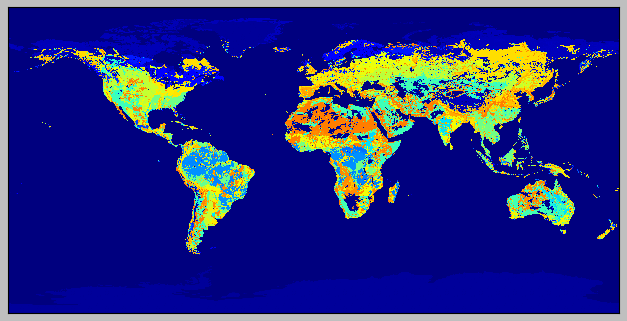

In [21]:
arr = np.array(GeoTiff('data/agro/soil/so2015v2.tif').read())
plt.imshow(arr)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('assets/soils.png', bbox_inches='tight')
plt.show()

In [84]:
data = pd.read_parquet('data/data.pq')

In [50]:
from sklearn.model_selection import GroupShuffleSplit

In [77]:
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

In [78]:
tr_idx, val_idx = next(gss.split(X=data, y=data[['val_1_next', 'val_2_next']], groups=data.ts.dt.date))

In [192]:
def cat_prep(data: pd.DataFrame):
    cover_frac = data[['cover_name']].value_counts().reset_index().rename(columns={0:'perc'})
    cover_frac.loc[:, 'perc'] = cover_frac.perc/cover_frac.perc.sum()*100
    cover_frac.loc[:, 'cover_name_new'] = cover_frac.cover_name
    cover_frac.loc[cover_frac.perc < 5, 'cover_name_new'] = 'Other'
    cover_frac = cover_frac.drop(['perc'], axis=1)

    soil_frac = data[['soil_label']].value_counts().reset_index().rename(columns={0:'perc'})
    soil_frac.loc[:, 'perc'] = soil_frac.perc/soil_frac.perc.sum()*100
    soil_frac.loc[:, 'soil_label_new'] = soil_frac.soil_label
    soil_frac.loc[soil_frac.perc < 2, 'soil_label_new'] = 'Other'
    soil_frac = soil_frac.drop(['perc'], axis=1)

    cult = pd.read_csv('data/agro/cult.csv', sep=';').rename(columns={'id': 'kult'})
    data = data.merge(cover_frac, on='cover_name')\
                .merge(soil_frac, on='soil_label')\
                .merge(cult, on='kult')\
                .drop(['cover_name', 'soil_label'], axis=1)\
                .rename(columns={'cover_name_new': 'cover_name', 'soil_label_new': 'soil_label'})

    data.loc[:, 'soiltype'] = data.soil_label.map({elm: i for i,elm in enumerate(data.soil_label.unique())})
    data.loc[:, 'covertype'] = data.cover_name.map({elm: i for i,elm in enumerate(data.cover_name.unique())})
    data.loc[:, 'culttype'] = data.type.map({elm: i for i,elm in enumerate(data.type.unique())})

    return data

In [217]:
data = pd.read_parquet('data/data.pq')
cult = pd.read_csv('data/agro/cult.csv', sep=';').rename(columns={'id': 'kult'})
data = data.merge(cover_frac, on='cover_name')\
            .merge(soil_frac, on='soil_label')\
            .merge(cult, on='kult')\
            .drop(['cover_name', 'soil_label'], axis=1)\
            .rename(columns={'cover_name_new': 'cover_name', 'soil_label_new': 'soil_label'})

data.loc[:, 'soiltype'] = data.soil_label.map({elm: i for i,elm in enumerate(data.soil_label.unique())})
data.loc[:, 'covertype'] = data.cover_name.map({elm: i for i,elm in enumerate(data.cover_name.unique())})
data.loc[:, 'culttype'] = data.type.map({elm: i for i,elm in enumerate(data.type.unique())})

In [152]:
frac[frac<2] = 'Other'

In [140]:
data.reset_index(inplace=True)